In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel('DL multiclass classification data.xlsx')

In [3]:
df

,CAT1,ORD1,ORD2,ORD3,ORD4,ORD5,ORD6,ORD7,ORD8,ORD9,ORD10,ORD11,ORD12,PRICE
0,0,0.00632,18.0,2.31,0.538,6.575,65.2,4.090,1,296,15.3,396.90,4.98,HIGH
1,0,0.02731,0.0,7.07,0.469,6.421,78.9,4.967,2,242,17.8,396.90,9.14,MEDIUM
2,0,0.02729,0.0,7.07,0.469,7.185,61.1,4.967,2,242,17.8,392.83,4.03,HIGH
3,0,0.03237,0.0,2.18,0.458,6.998,45.8,6.062,3,222,18.7,394.63,2.94,HIGH
4,0,0.06905,0.0,2.18,0.458,7.147,54.2,6.062,3,222,18.7,396.90,5.33,HIGH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007,0,0.06263,0.0,11.93,0.573,6.593,69.1,2.479,1,273,21.0,391.99,9.67,MEDIUM
1008,0,0.04527,0.0,11.93,0.573,6.120,76.7,2.288,1,273,21.0,396.90,9.08,MEDIUM
1009,0,0.06076,0.0,11.93,0.573,6.976,91.0,2.168,1,273,21.0,396.90,5.64,HIGH
1010,0,0.10959,0.0,11.93,0.573,6.794,89.3,2.389,1,273,21.0,393.45,6.48,MEDIUM


### info: ORD8 is categorical column, Convert ORD8 column to object data type

In [4]:
df['ORD8'] = df['ORD8'].astype('object')
print(df['ORD8'].dtype) 

object


In [5]:
from skimpy import skim
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 1012   │ │ float64     │ 10    │                                                          │
│ │ Number of columns │ 14     │ │ int32       │ 3     │                                                          │
│ └───────────────────┴────────┘ │ string      │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name     ┃ NA   ┃ NA %   ┃ mean    ┃ sd     ┃ p0       ┃ p25     ┃ p50    ┃ p75   ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ CAT1            │    0 │      0 │   0.069 │   0.25 │        0 │       0 │      0 │     0 │     1 │ ▇    ▁  │  │
│ │ ORD1            │    0 │      0 │     3.6 │    8.6 │   0.0063 │   0.082 │   0.26 │   3.7 │    89 │    ▇    │  │
│ │ ORD2            │    0 │      0 │      11 │     23 │        0 │       0 │      0 │    12 │   100 │   ▇▁    │  │
│ │ ORD3            │    0 │      0 │      11 │    6.9 │     0.46 │     5.2 │    9.7 │    18 │    28 │ ▇▇▃▇▃▁  │  │
│ │ ORD4            │    0 │      0 │    0.55 │   0.12 │     0.39 │    0.45 │   0.54 │  0.62 │  0.87 │ ▇▇▅▃▂▁  │  │
│ │ ORD5            │    0 │      0 │     6.3 │    0.7 │      3.6 │     5.9 │    6.2 │   6.6 │   8.8 │  ▁▇▇▂▁  │  │
│ │ ORD6            │    0 │      0 │      69 │     28 │      2.9 │      45 │     78 │    94 │   100 │ ▁▂▂▂▃▇  │  │
│ │ ORD7            │    0 │      0 │     3.8 │    2.1 │      1.1 │     2.1 │    3.2 │   5.2 │    12 │  ▇▅▃▁   │  │
│ │ ORD8            │    0 │      0 │     9.5 │    8.7 │        1 │       4 │      5 │    24 │    24 │ ▇▇   ▆  │  │
│ │ ORD9            │    0 │      0 │     410 │    170 │      190 │     280 │    330 │   670 │   710 │ ▅▇▅  ▆  │  │
│ │ ORD10           │    0 │      0 │      18 │    2.2 │       13 │      17 │     19 │    20 │    22 │ ▁▂▂▅▇▂  │  │
│ │ ORD11           │    0 │      0 │     360 │     91 │     0.32 │     380 │    390 │   400 │   400 │      ▇  │  │
│ │ ORD12           │    0 │      0 │      13 │    7.1 │      1.7 │     6.9 │     11 │    17 │    38 │  ▇▇▆▂▁  │  │
│ └─────────────────┴──────┴────────┴─────────┴────────┴──────────┴─────────┴────────┴───────┴───────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ PRICE                     │       0 │          0 │                            1 │                     1012 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

### Column Types

- **Numerical** - ORD1 to ORD12 except ORD8
- **Categorical** - CAT1, ORD8, PRICE

### Univariate Analysis 

Univariate analysis focuses on analyzing each feature in the dataset independently.

- **Distribution analysis**: The distribution of each feature is examined to identify its shape, central tendency, and dispersion.

- **Identifying potential issues**: Univariate analysis helps in identifying potential problems with the data such as outliers, skewness, and missing values

### Univariate Analysis of Categorical Column

### CAT1

**conclusions**

- 93.1% of the data falls under '0' category of 'CAT1' column
- 6.9% of the data falls under '1' category of 'CAT1' column

In [6]:
df['CAT1'].isnull().sum()

0

In [7]:
df['CAT1'].value_counts()

CAT1
0    942
1     70
Name: count, dtype: int64

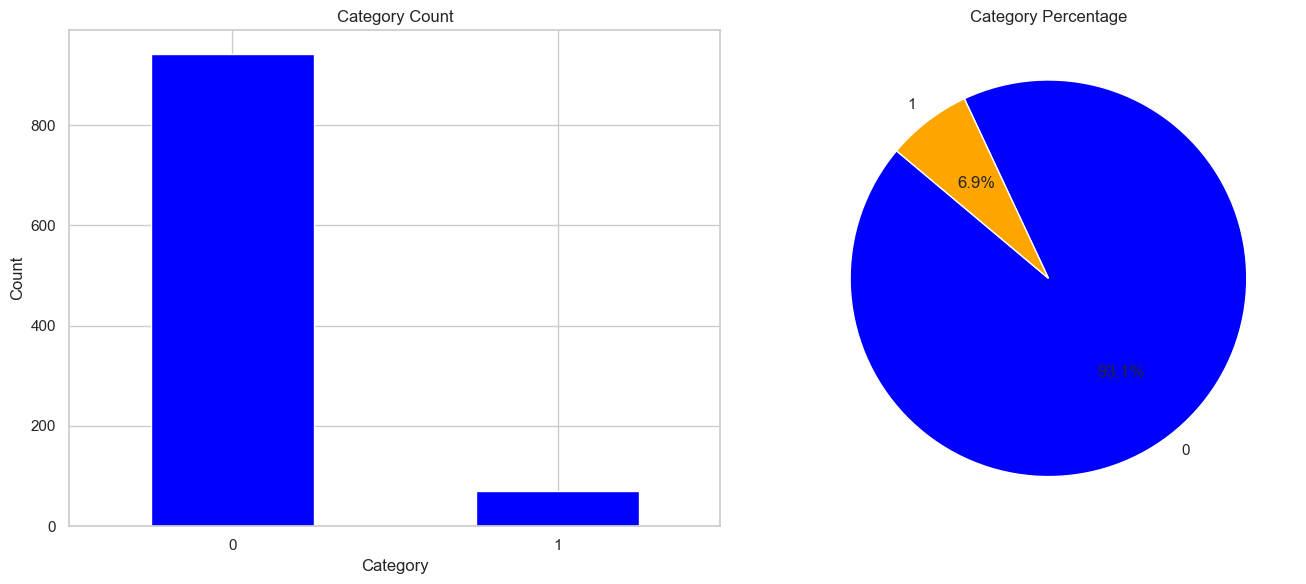

In [8]:
sns.set(style="whitegrid")

plot_df = pd.DataFrame({'CAT1_count': df['CAT1'].value_counts()})

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

plot_df['CAT1_count'].plot(kind='bar', ax=axes[0], color='blue')
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Count')
axes[0].set_title('Category Count')
axes[0].set_xticks(range(len(plot_df)))
axes[0].set_xticklabels(plot_df.index, rotation=0)

axes[1].pie(plot_df['CAT1_count'], labels=plot_df.index, autopct='%0.1f%%', startangle=140, colors=['blue', 'orange', 'green'])
axes[1].set_title('Category Percentage')

plt.tight_layout()

plt.show()

### ORD8

**conclusions**

- Major percentage of data falls under category 4, 5 and 24 of 'ORD8' column

In [9]:
df['ORD8'].value_counts()

ORD8
24    264
5     230
4     220
3      76
6      52
2      48
8      48
1      40
7      34
Name: count, dtype: int64

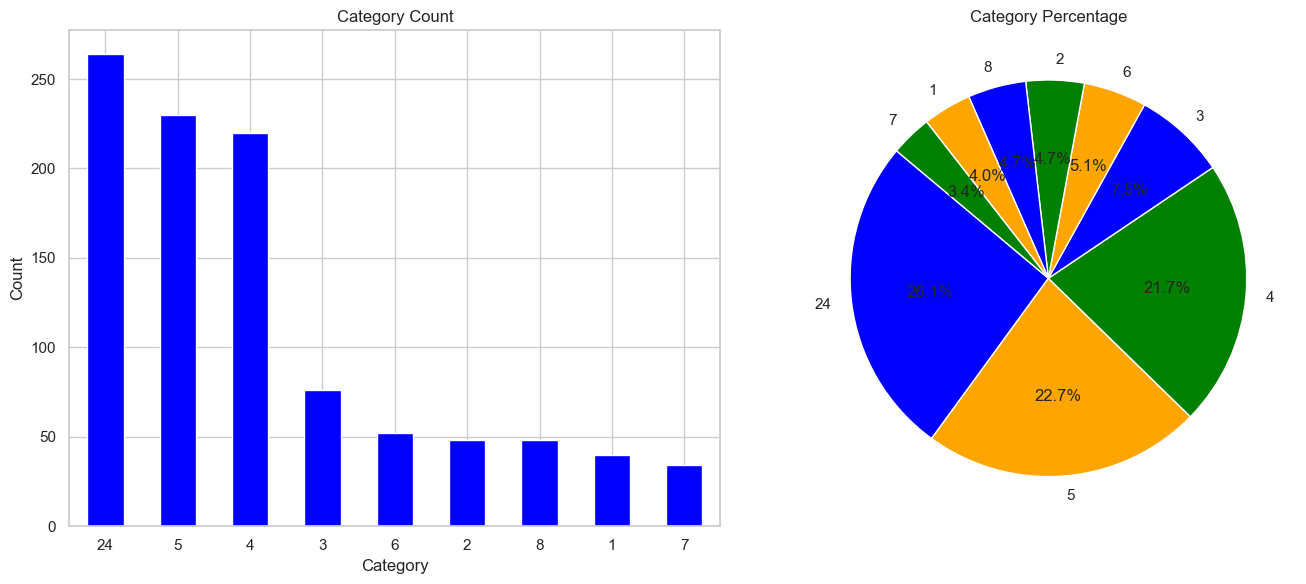

In [10]:
plot_df = pd.DataFrame({'ORD8_count': df['ORD8'].value_counts()})

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

plot_df['ORD8_count'].plot(kind='bar', ax=axes[0], color='blue')
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Count')
axes[0].set_title('Category Count')
axes[0].set_xticks(range(len(plot_df)))
axes[0].set_xticklabels(plot_df.index, rotation=0)

axes[1].pie(plot_df['ORD8_count'], labels=plot_df.index, autopct='%1.1f%%', startangle=140, colors=['blue', 'orange', 'green'])
axes[1].set_title('Category Percentage')

plt.tight_layout()

plt.show()

### Univariate Analysis of Numerical Column

### ORD1

**conclusions**

- The data is highely(positively) skewed
- There are some outliers
- Since data is skewed will have to remove the outlier using IQR Method and then either     trimming or capping

In [11]:
df['ORD1'].describe()

count    1012.000000
mean        3.613524
std         8.597290
min         0.006320
25%         0.081990
50%         0.256510
75%         3.678220
max        88.976200
Name: ORD1, dtype: float64

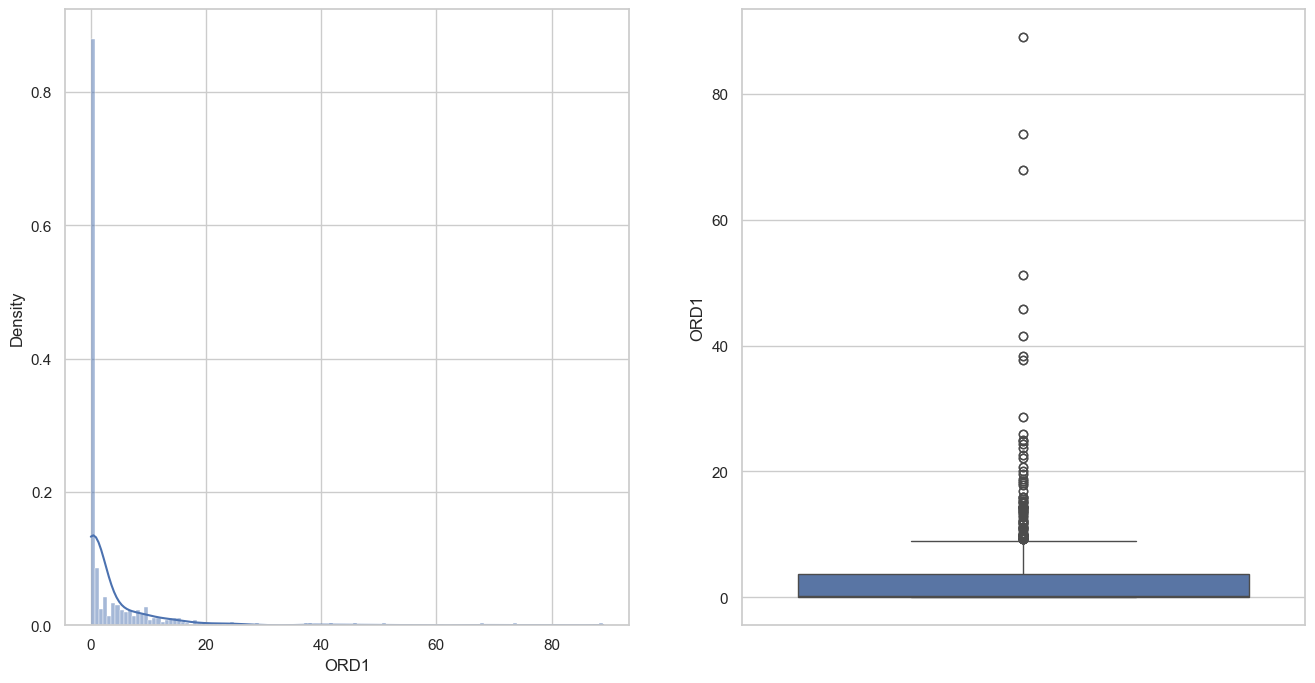

In [13]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.histplot(df['ORD1'], kde=True, stat="density")

plt.subplot(1,2,2)
sns.boxplot(df['ORD1'])
plt.show()

In [14]:
df['ORD1'].skew()

5.2153858878855495

### Finding the IQR

In [15]:
percentile25 = df['ORD1'].quantile(0.25)
percentile75 = df['ORD1'].quantile(0.75)
iqr = percentile75 - percentile25
print("IQR:",iqr)
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

IQR: 3.5962300000000003
Upper limit 9.072565
Lower limit -5.312355


# Finding Outliers

In [16]:
df[df['ORD1'] > upper_limit]

,CAT1,ORD1,ORD2,ORD3,ORD4,ORD5,ORD6,ORD7,ORD8,ORD9,ORD10,ORD11,ORD12,PRICE
367,0,13.5222,0.0,18.1,0.631,3.863,100.0,1.511,24,666,20.2,131.42,13.33,MEDIUM
371,0,9.2323,0.0,18.1,0.631,6.216,100.0,1.169,24,666,20.2,366.15,9.53,HIGH
373,0,11.1081,0.0,18.1,0.668,4.906,100.0,1.174,24,666,20.2,396.90,34.77,LOW
374,0,18.4982,0.0,18.1,0.668,4.138,100.0,1.137,24,666,20.2,396.90,37.97,LOW
375,0,19.6091,0.0,18.1,0.671,7.313,97.9,1.316,24,666,20.2,396.90,13.44,LOW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974,0,15.5757,0.0,18.1,0.580,5.926,71.0,2.908,24,666,20.2,368.74,18.13,MEDIUM
975,0,13.0751,0.0,18.1,0.580,5.713,56.7,2.824,24,666,20.2,396.90,14.76,MEDIUM
983,0,15.0234,0.0,18.1,0.614,5.304,97.3,2.101,24,666,20.2,349.48,24.91,LOW
984,0,10.2330,0.0,18.1,0.614,6.185,96.7,2.171,24,666,20.2,379.70,18.03,LOW


In [17]:
df[df['ORD1'] < lower_limit]

,CAT1,ORD1,ORD2,ORD3,ORD4,ORD5,ORD6,ORD7,ORD8,ORD9,ORD10,ORD11,ORD12,PRICE


### Since there are 132 rows having outlier trimming is not a feasible solution, as it will lead to decrease in 132 rows out of 1012 rows, so here will prefer capping

# Capping

In [18]:
new_df_cap = df.copy()

new_df_cap['ORD1'] = np.where(
    new_df_cap['ORD1'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['ORD1'] < lower_limit,
        lower_limit,
        new_df_cap['ORD1']
    )
)
new_df_cap.shape

(1012, 14)

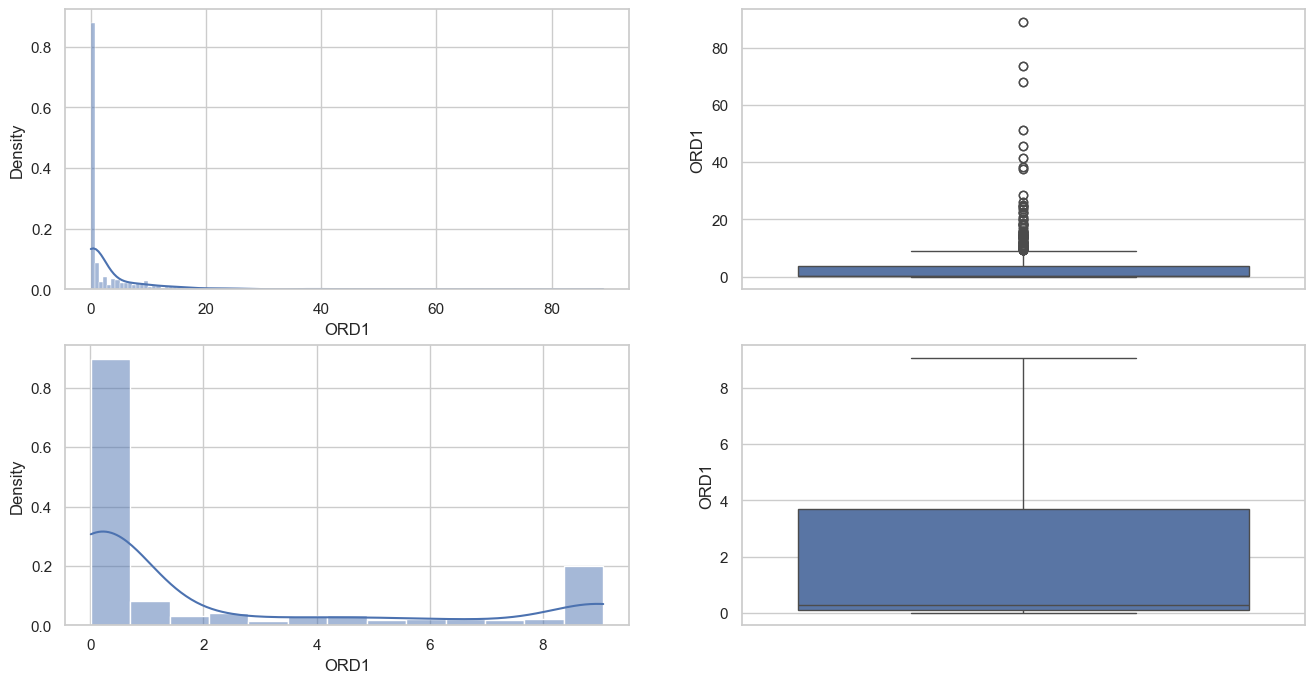

In [19]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(df['ORD1'], kde=True, stat="density")

plt.subplot(2,2,2)
sns.boxplot(df['ORD1'])

plt.subplot(2,2,3)
sns.histplot(new_df_cap['ORD1'], kde=True, stat="density")

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['ORD1'])

plt.show()

### ORD2

**conclusions**

- The data is highely(positively) skewed
- There are some outliers
- Since data is skewed will have to remove the outlier using IQR Method and then either     trimming or capping

In [20]:
df['ORD2'].describe()

count    1012.000000
mean       11.363636
std        23.310916
min         0.000000
25%         0.000000
50%         0.000000
75%        12.500000
max       100.000000
Name: ORD2, dtype: float64

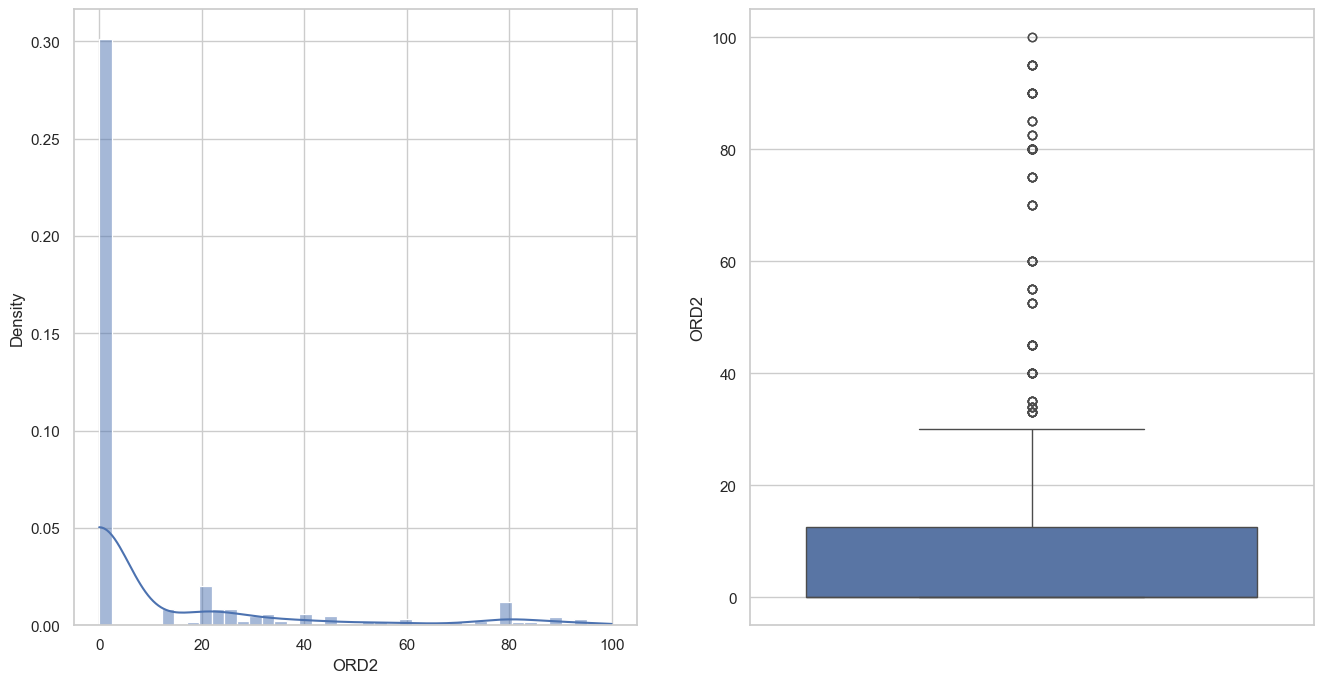

In [21]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.histplot(df['ORD2'], kde=True, stat="density")

plt.subplot(1,2,2)
sns.boxplot(df['ORD2'])
plt.show()

### Finding the IQR

In [22]:
percentile25 = df['ORD2'].quantile(0.25)
percentile75 = df['ORD2'].quantile(0.75)
iqr = percentile75 - percentile25
print("IQR:",iqr)
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

IQR: 12.5
Upper limit 31.25
Lower limit -18.75


In [23]:
df[df['ORD2'] > upper_limit].shape[0]

136

In [24]:
df[df['ORD2'] < lower_limit].shape[0]

0

### Capping

In [25]:
new_df_cap['ORD2'] = np.where(
    new_df_cap['ORD2'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['ORD2'] < lower_limit,
        lower_limit,
        new_df_cap['ORD2']
    )
)

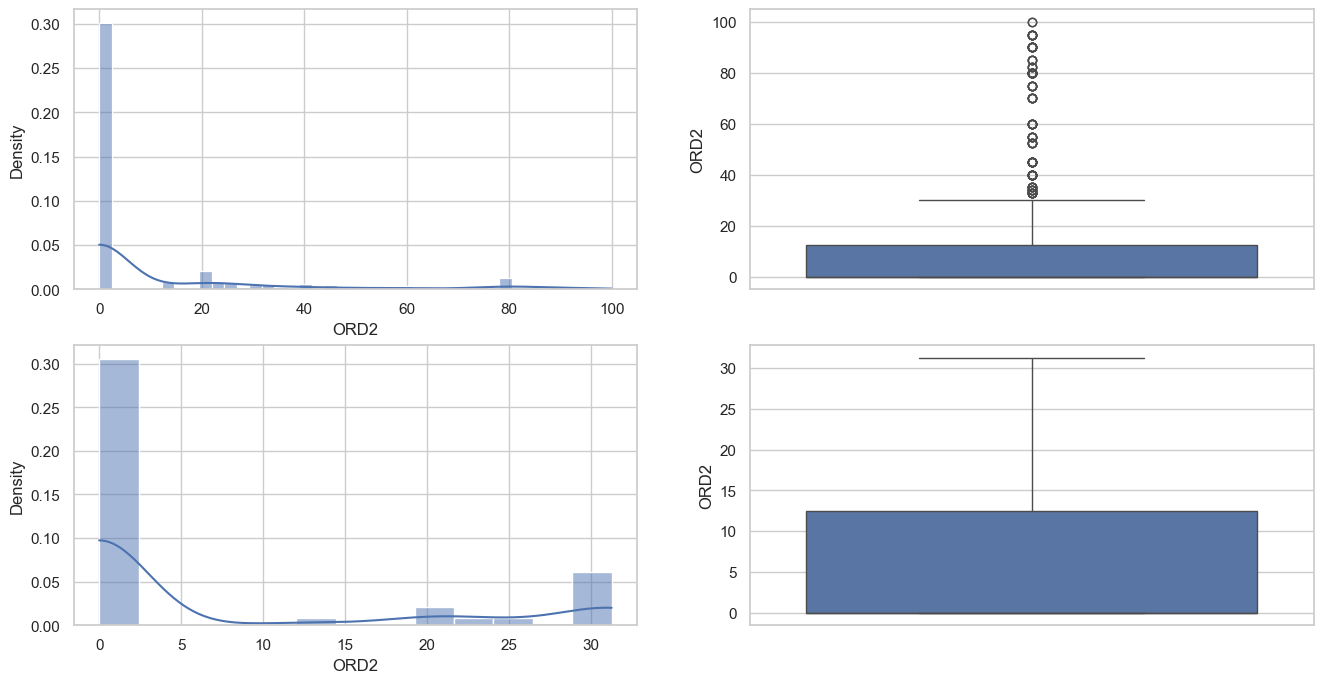

In [26]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(df['ORD2'], kde=True, stat="density")

plt.subplot(2,2,2)
sns.boxplot(df['ORD2'])

plt.subplot(2,2,3)
sns.histplot(new_df_cap['ORD2'], kde=True, stat="density")

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['ORD2'])

plt.show()

### ORD3

**conclusions**

- The data is bimodal
- There are no outliers

In [27]:
df['ORD3'].describe()

count    1012.000000
mean       11.136779
std         6.856959
min         0.460000
25%         5.190000
50%         9.690000
75%        18.100000
max        27.740000
Name: ORD3, dtype: float64

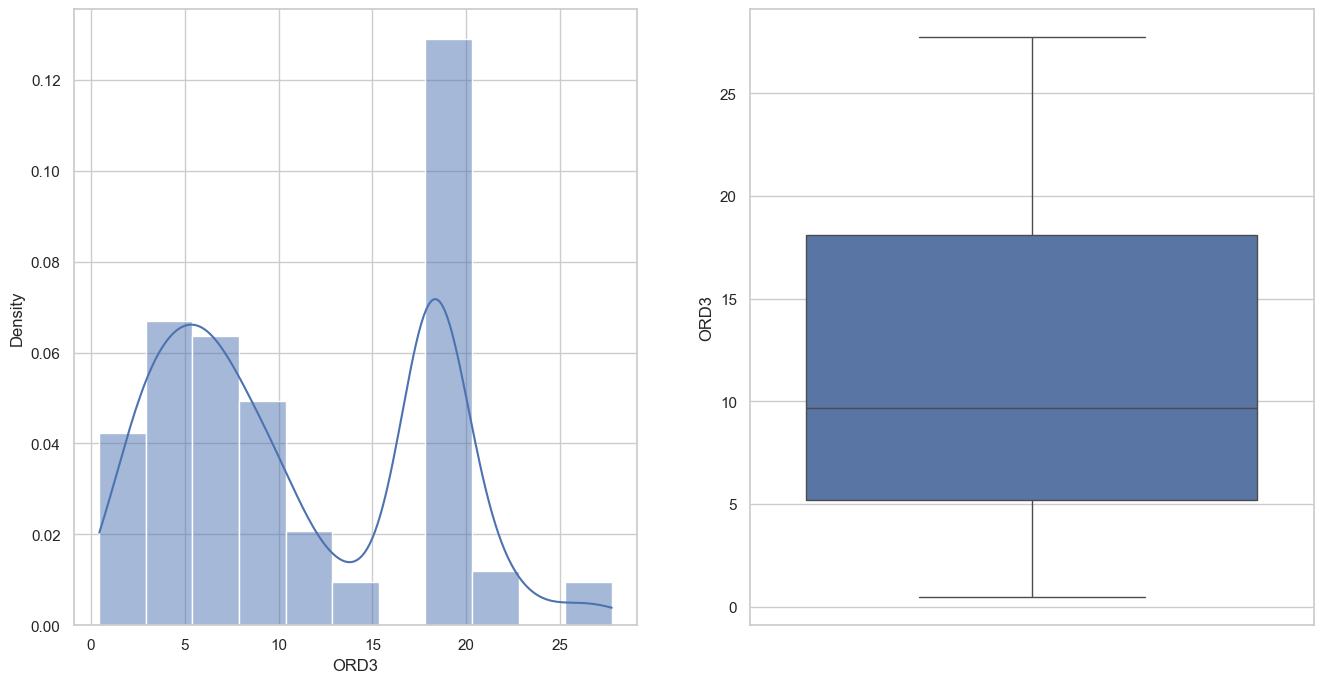

In [28]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.histplot(df['ORD3'], kde=True, stat="density")

plt.subplot(1,2,2)
sns.boxplot(df['ORD3'])
plt.show()

### ORD4

**conclusions**

- The data is right skewed
- There are no outliers

In [29]:
df['ORD4'].describe()

count    1012.000000
mean        0.554696
std         0.115820
min         0.385000
25%         0.449000
50%         0.538000
75%         0.624000
max         0.871000
Name: ORD4, dtype: float64

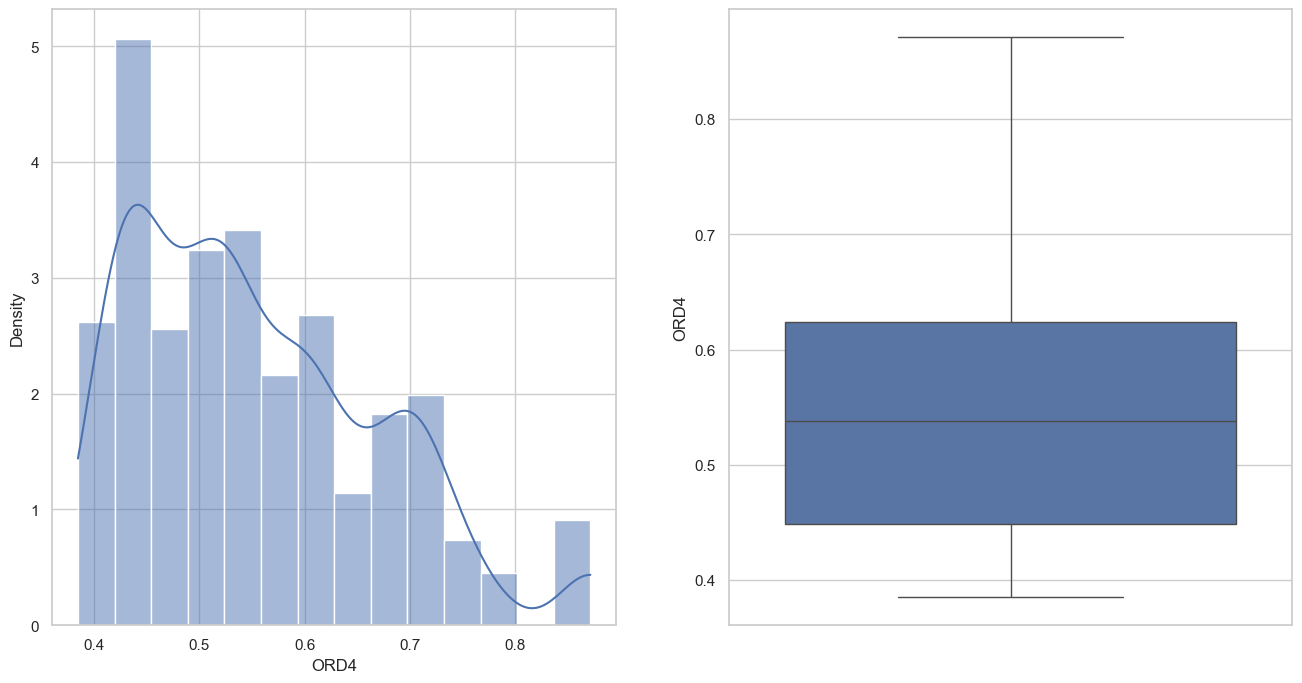

In [30]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.histplot(df['ORD4'], kde=True, stat="density")

plt.subplot(1,2,2)
sns.boxplot(df['ORD4'])
plt.show()

### ORD5

**conclusions**

- The data is almost normally distributed
- There are few outliers

In [31]:
df['ORD5'].describe()

count    1012.000000
mean        6.284634
std         0.702270
min         3.561000
25%         5.885000
50%         6.208500
75%         6.625000
max         8.780000
Name: ORD5, dtype: float64

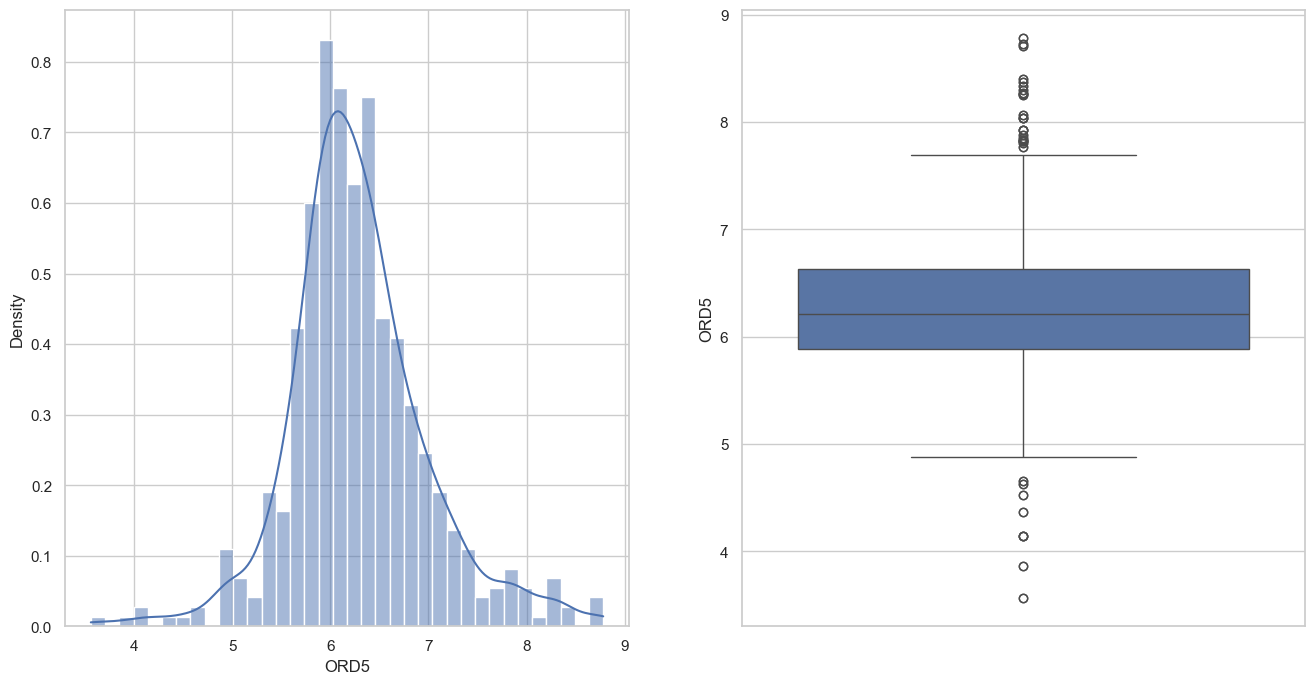

In [32]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.histplot(df['ORD5'], kde=True, stat="density")

plt.subplot(1,2,2)
sns.boxplot(df['ORD5'])
plt.show()

### Finding the IQR

In [33]:
percentile25 = df['ORD5'].quantile(0.25)
percentile75 = df['ORD5'].quantile(0.75)
iqr = percentile75 - percentile25
print("IQR:",iqr)
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

IQR: 0.7400000000000002
Upper limit 7.735
Lower limit 4.7749999999999995


In [34]:
df[df['ORD5'] > upper_limit].shape[0]

44

In [35]:
df[df['ORD5'] < lower_limit].shape[0]

16

# Capping

In [36]:
new_df_cap['ORD5'] = np.where(
    new_df_cap['ORD5'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['ORD5'] < lower_limit,
        lower_limit,
        new_df_cap['ORD5']
    )
)

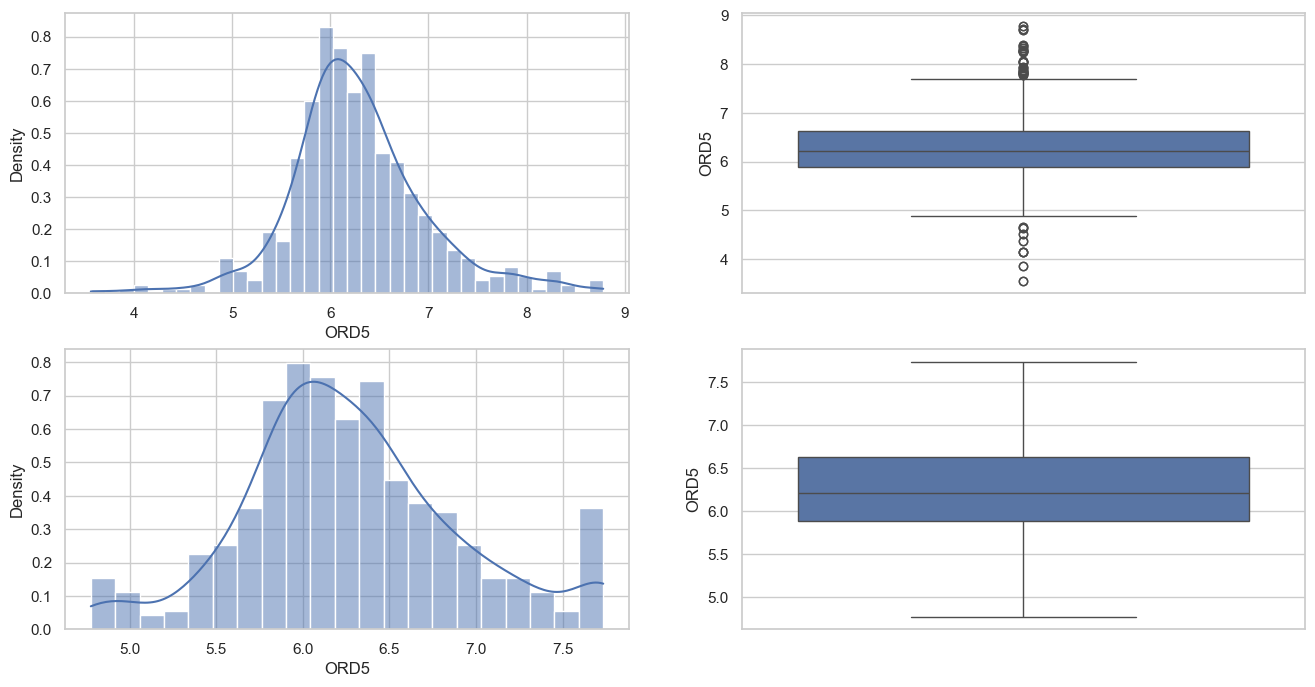

In [37]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(df['ORD5'], kde=True, stat="density")

plt.subplot(2,2,2)
sns.boxplot(df['ORD5'])

plt.subplot(2,2,3)
sns.histplot(new_df_cap['ORD5'], kde=True, stat="density")

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['ORD5'])

plt.show()

### ORD6

**conclusions**

- The data is left-skewed
- There are no outliers

In [38]:
df['ORD6'].describe()

count    1012.000000
mean       68.574901
std        28.134937
min         2.900000
25%        45.000000
50%        77.500000
75%        94.100000
max       100.000000
Name: ORD6, dtype: float64

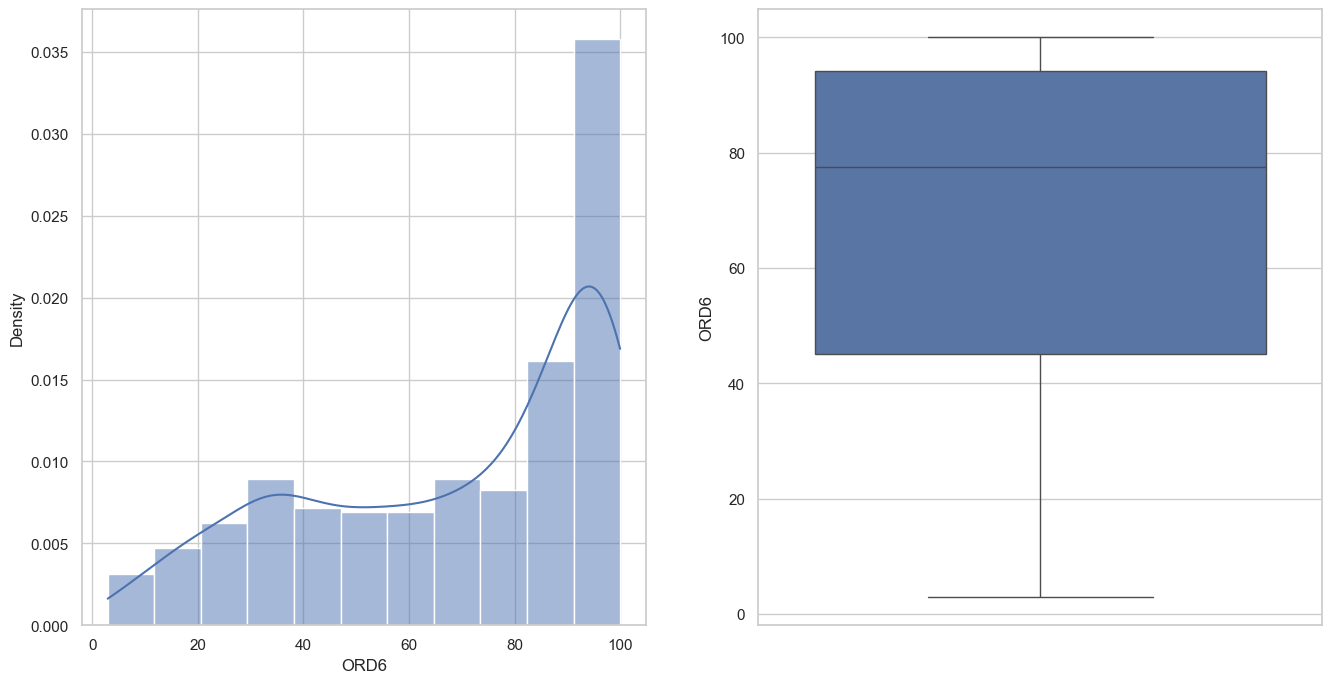

In [39]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.histplot(df['ORD6'], kde=True, stat="density")

plt.subplot(1,2,2)
sns.boxplot(df['ORD6'])
plt.show()

### ORD7

**conclusions**

- The data is right-skewed
- There are very few outliers

In [40]:
df['ORD7'].describe()

count    1012.000000
mean        3.795111
std         2.104678
min         1.130000
25%         2.100000
50%         3.207500
75%         5.212000
max        12.127000
Name: ORD7, dtype: float64

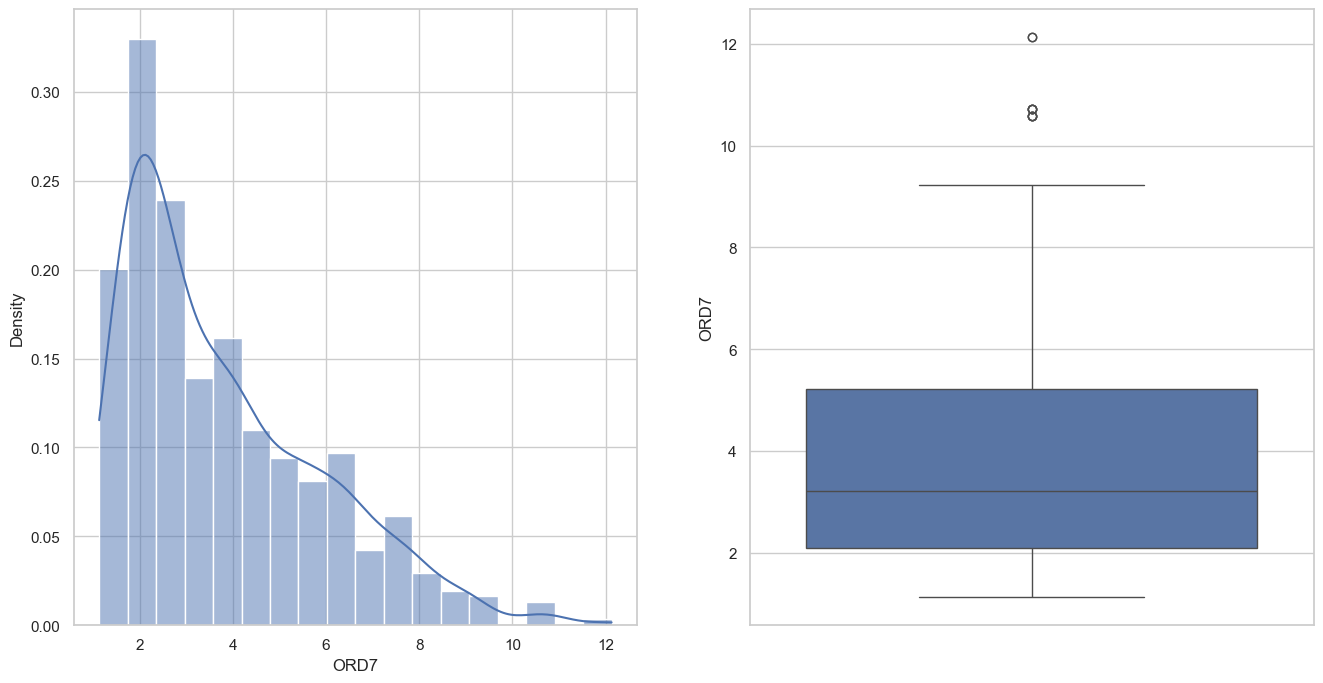

In [41]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.histplot(df['ORD7'], kde=True, stat="density")

plt.subplot(1,2,2)
sns.boxplot(df['ORD7'])
plt.show()

### Finding the IQR

In [42]:
percentile25 = df['ORD7'].quantile(0.25)
percentile75 = df['ORD7'].quantile(0.75)
iqr = percentile75 - percentile25
print("IQR:",iqr)
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

IQR: 3.1119999999999997
Upper limit 9.879999999999999
Lower limit -2.567999999999999


In [43]:
df[df['ORD7'] > upper_limit].shape[0]

10

In [44]:
df[df['ORD7'] < lower_limit].shape[0]

0

### Capping

In [45]:
new_df_cap['ORD7'] = np.where(
    new_df_cap['ORD7'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['ORD7'] < lower_limit,
        lower_limit,
        new_df_cap['ORD7']
    )
)

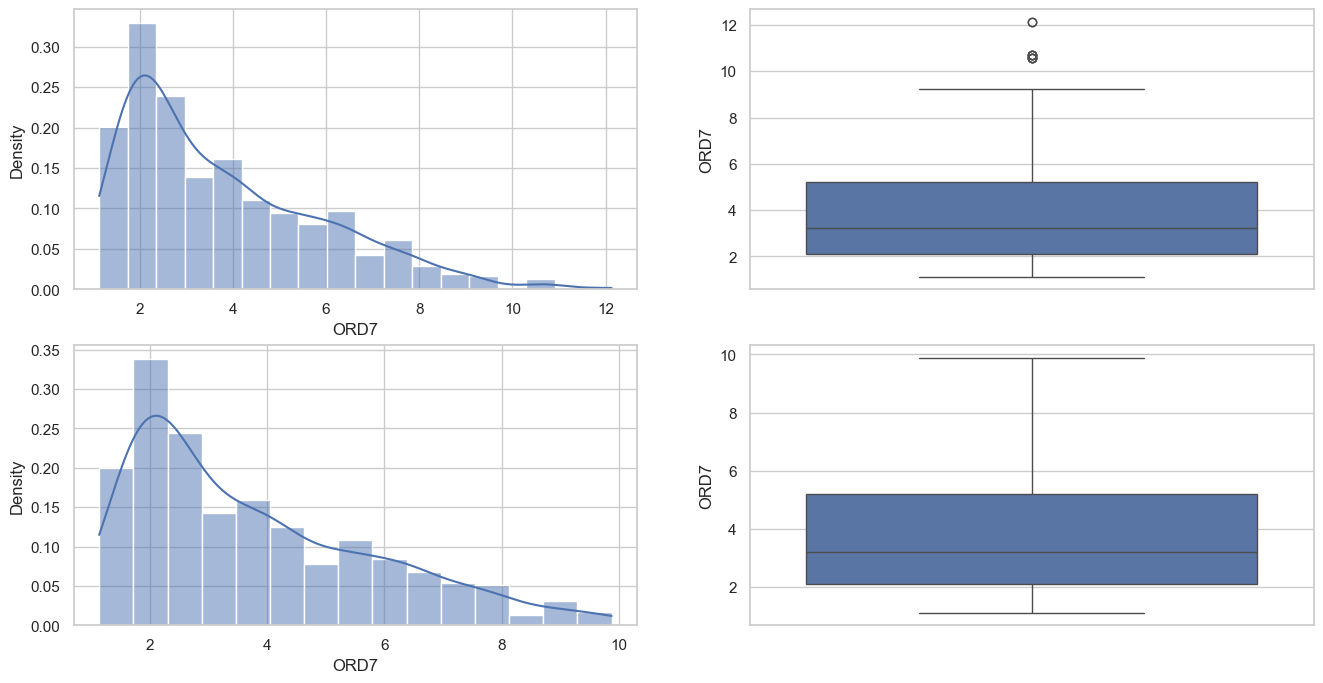

In [46]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(df['ORD7'], kde=True, stat="density")

plt.subplot(2,2,2)
sns.boxplot(df['ORD7'])

plt.subplot(2,2,3)
sns.histplot(new_df_cap['ORD7'], kde=True, stat="density")

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['ORD7'])

plt.show()

### ORD 9

**conclusions**

- The data is like bimodal
- There are no outliers

In [47]:
df['ORD9'].describe()

count    1012.000000
mean      408.237154
std       168.453744
min       187.000000
25%       279.000000
50%       330.000000
75%       666.000000
max       711.000000
Name: ORD9, dtype: float64

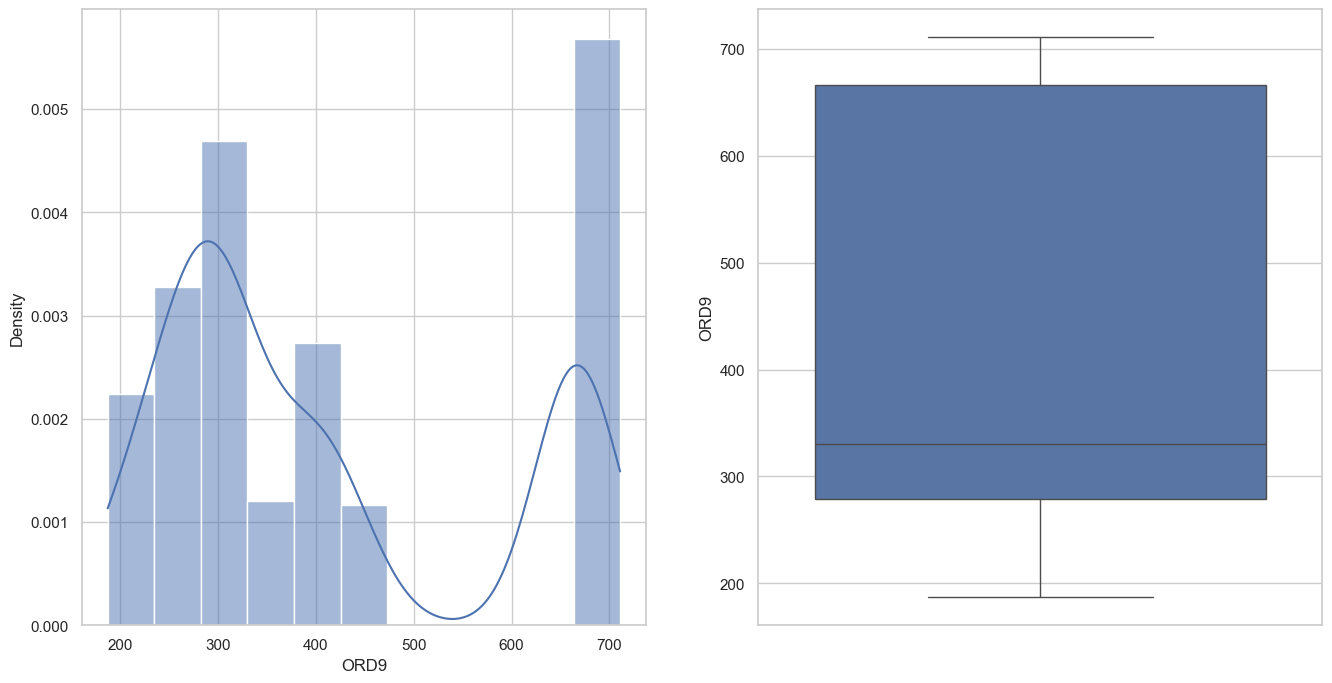

In [48]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.histplot(df['ORD9'], kde=True, stat="density")

plt.subplot(1,2,2)
sns.boxplot(df['ORD9'])
plt.show()

### ORD10

**conclusions**

- The data is right-skewed
- There are 2 outliers, but the values are not too significant to affect the model performance

In [49]:
df['ORD10'].describe()

count    1012.000000
mean       18.455534
std         2.163875
min        12.600000
25%        17.400000
50%        19.050000
75%        20.200000
max        22.000000
Name: ORD10, dtype: float64

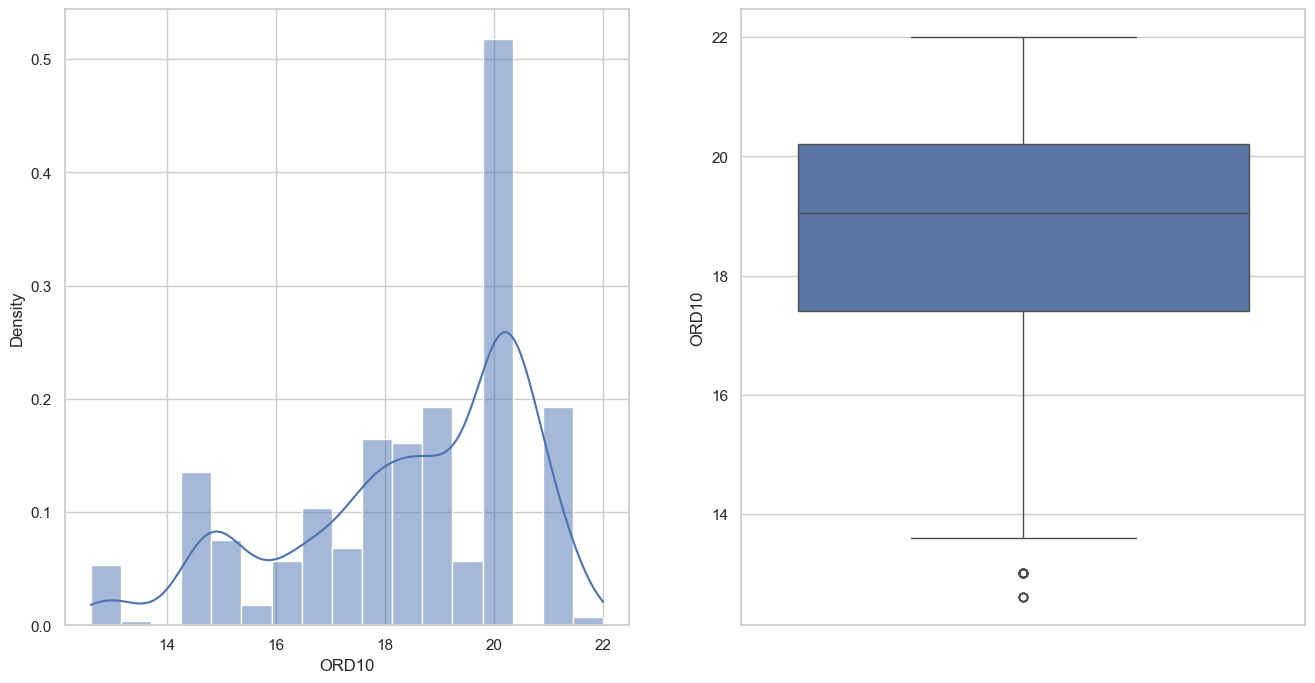

In [50]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.histplot(df['ORD10'], kde=True, stat="density")

plt.subplot(1,2,2)
sns.boxplot(df['ORD10'])
plt.show()

### ORD11

**conclusions**

- The data is left-skewed
- There are too many outliers

In [51]:
df['ORD11'].describe()

count    1012.000000
mean      356.674032
std        91.249702
min         0.320000
25%       375.330000
50%       391.440000
75%       396.230000
max       396.900000
Name: ORD11, dtype: float64

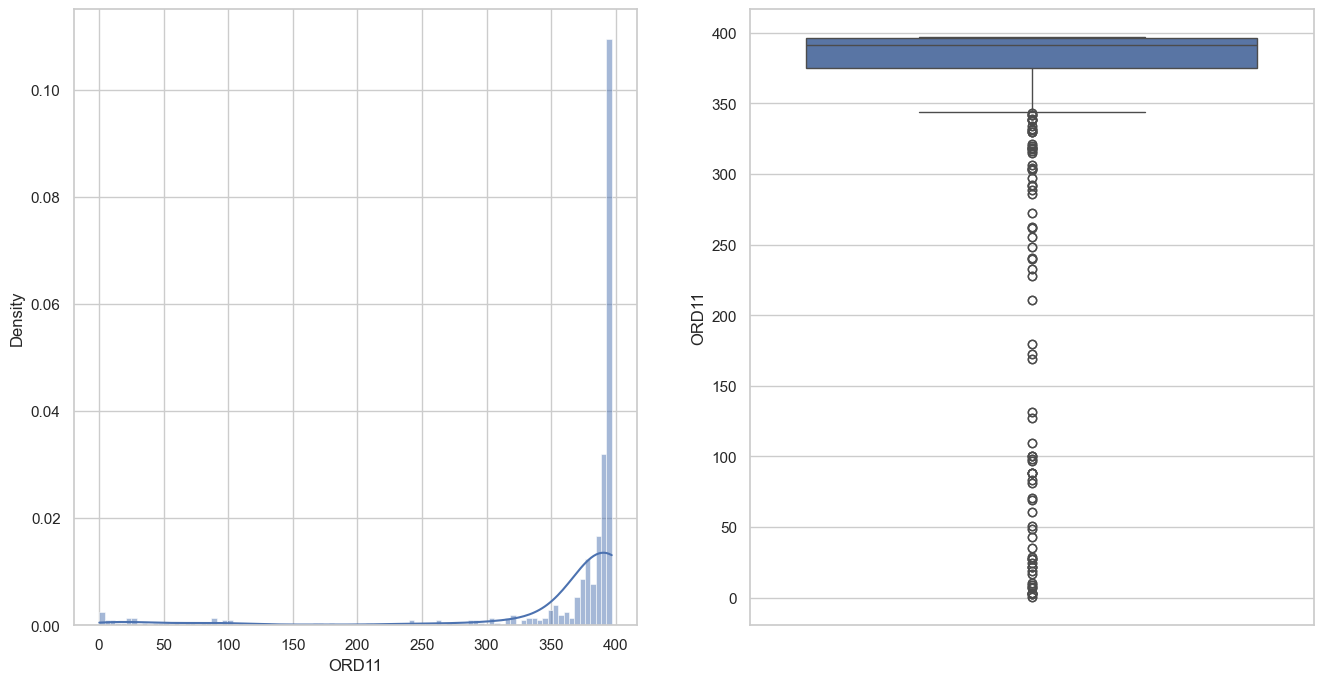

In [52]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.histplot(df['ORD11'], kde=True, stat="density")

plt.subplot(1,2,2)
sns.boxplot(df['ORD11'])
plt.show()

### Finding the IQR

In [53]:
percentile25 = df['ORD11'].quantile(0.25)
percentile75 = df['ORD11'].quantile(0.75)
iqr = percentile75 - percentile25
print("IQR:",iqr)
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

IQR: 20.900000000000034
Upper limit 427.58000000000004
Lower limit 343.9799999999999


In [54]:
df[df['ORD11'] < lower_limit].shape[0]

152

### Capping

In [55]:
new_df_cap['ORD11'] = np.where(
    new_df_cap['ORD11'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['ORD11'] < lower_limit,
        lower_limit,
        new_df_cap['ORD11']
    )
)

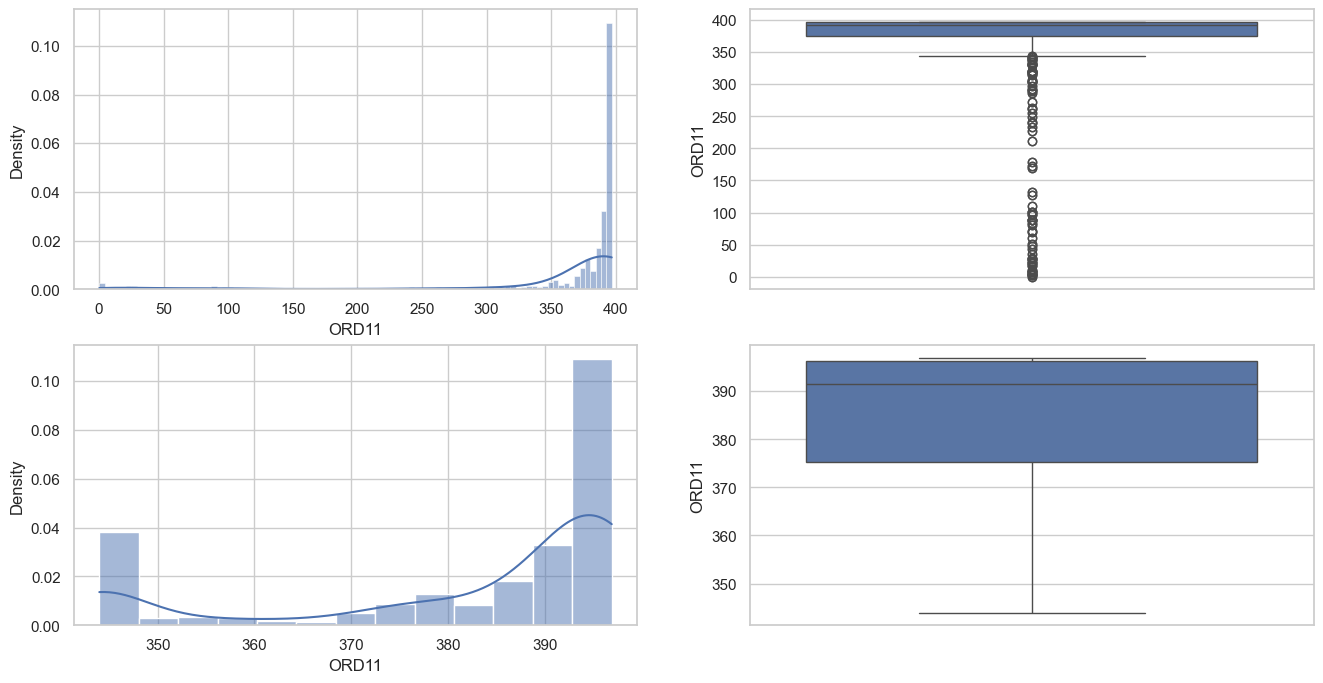

In [56]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(df['ORD11'], kde=True, stat="density")

plt.subplot(2,2,2)
sns.boxplot(df['ORD11'])

plt.subplot(2,2,3)
sns.histplot(new_df_cap['ORD11'], kde=True, stat="density")

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['ORD11'])

plt.show()

### ORD12

**conclusions**

- The data is little right-skewed
- There are few outliers

In [57]:
df['ORD12'].describe()

count    1012.000000
mean       12.653063
std         7.137529
min         1.730000
25%         6.930000
50%        11.360000
75%        16.960000
max        37.970000
Name: ORD12, dtype: float64

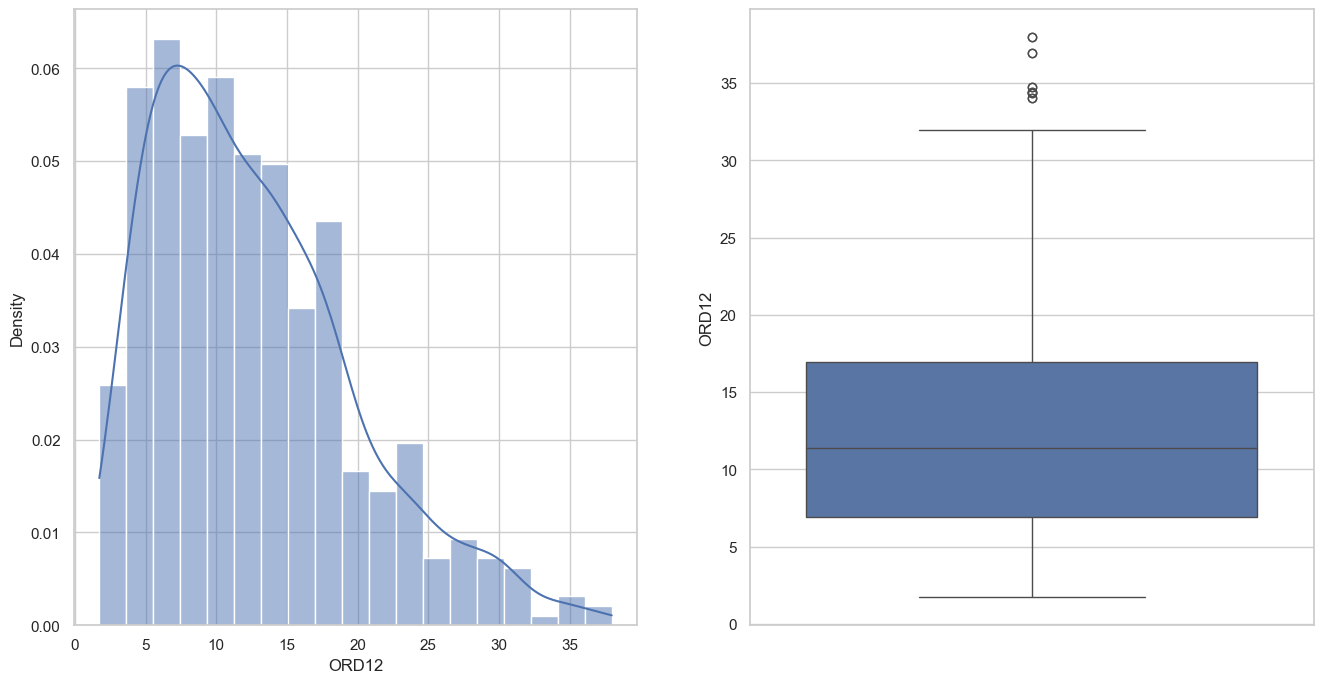

In [58]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.histplot(df['ORD12'], kde=True, stat="density")

plt.subplot(1,2,2)
sns.boxplot(df['ORD12'])
plt.show()

In [59]:
percentile25 = df['ORD12'].quantile(0.25)
percentile75 = df['ORD12'].quantile(0.75)
iqr = percentile75 - percentile25
print("IQR:",iqr)
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

IQR: 10.030000000000001
Upper limit 32.005
Lower limit -8.115000000000002


In [60]:
new_df_cap['ORD12'] = np.where(
    new_df_cap['ORD12'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['ORD12'] < lower_limit,
        lower_limit,
        new_df_cap['ORD12']
    )
)

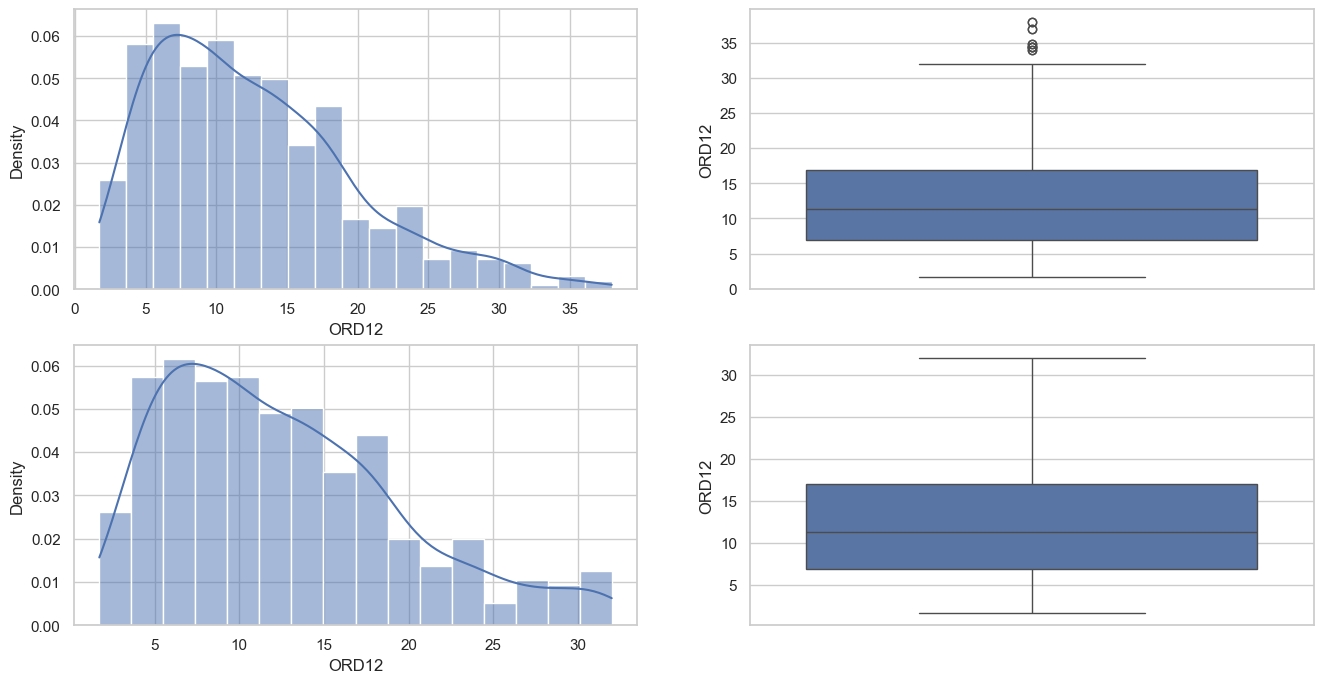

In [61]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(df['ORD12'], kde=True, stat="density")

plt.subplot(2,2,2)
sns.boxplot(df['ORD12'])

plt.subplot(2,2,3)
sns.histplot(new_df_cap['ORD12'], kde=True, stat="density")

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['ORD12'])

plt.show()

### Bivariate Analysis
**conclusions**

- Maximum Percentage of items in Category 3,7, and 8 of ORD8 column have high prices
-  Maximum Percentage of items in Category 24 of ORD8 column have low prices

<Axes: xlabel='ORD8', ylabel='PRICE'>

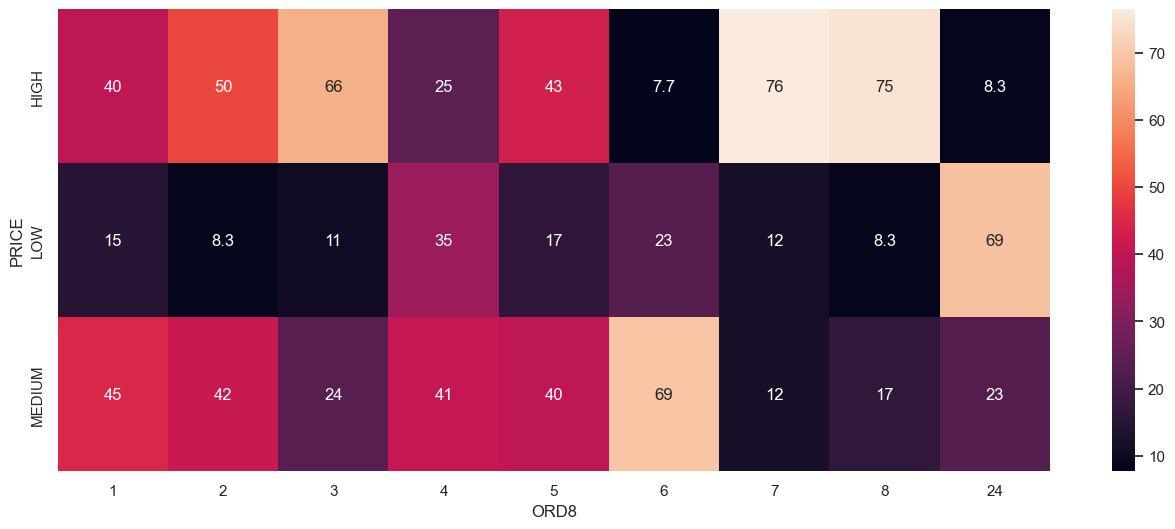

In [77]:
fig,ax=plt.subplots(figsize=(16,6))
sns.heatmap(pd.crosstab(df['PRICE'],df['ORD8'],normalize='columns')*100,annot=True)

<Axes: xlabel='CAT1', ylabel='PRICE'>

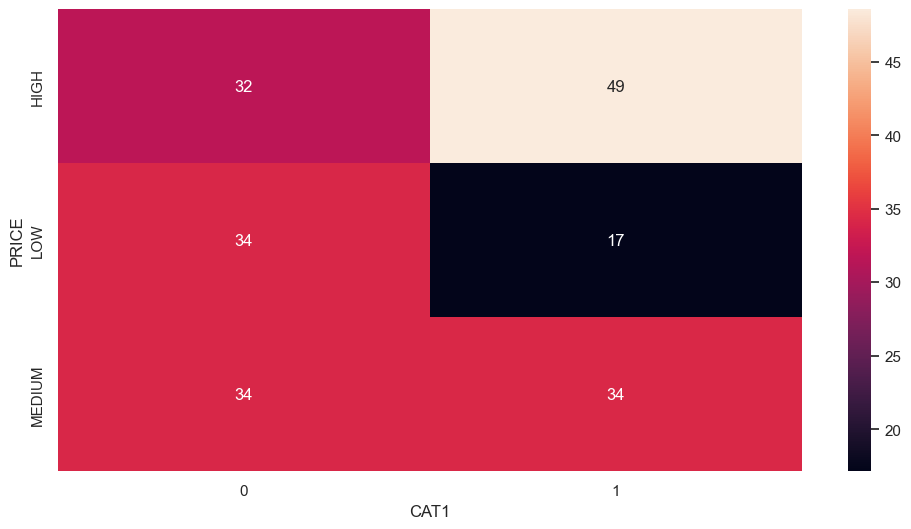

In [81]:
fig,ax=plt.subplots(figsize=(12,6))
sns.heatmap(pd.crosstab(df['PRICE'],df['CAT1'],normalize='columns')*100,annot=True)

<Axes: >

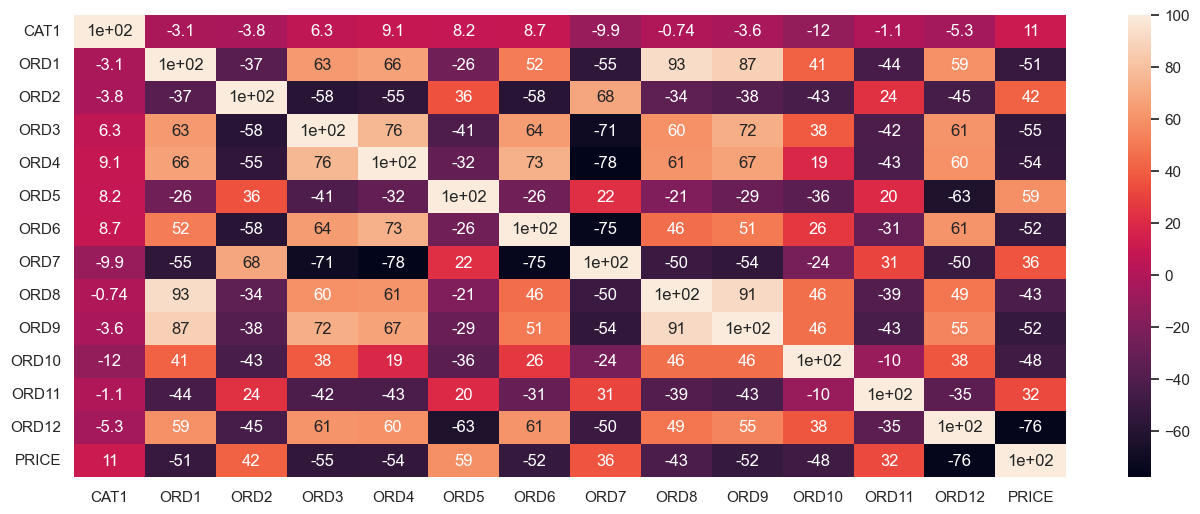

In [80]:
fig,ax=plt.subplots(figsize=(16,6))
sns.heatmap(new_df_cap.corr()*100,annot=True)

# Analyzing Output Column

### PRICE

**conclusions**

- The data is fairly balanced

In [62]:
new_df_cap['PRICE'].value_counts().reset_index()

,PRICE,count
0,MEDIUM,346
1,LOW,334
2,HIGH,332


### Encode the target column PRICE

In [63]:
price_encoding = {"HIGH": 2, "MEDIUM": 1, "LOW": 0}
new_df_cap["PRICE"] = new_df_cap["PRICE"].map(price_encoding)
new_df_cap["PRICE"].value_counts().reset_index()

,PRICE,count
0,1,346
1,0,334
2,2,332


In [83]:
new_df_cap.head()

,CAT1,ORD1,ORD2,ORD3,ORD4,ORD5,ORD6,ORD7,ORD8,ORD9,ORD10,ORD11,ORD12,PRICE
0,0,0.00632,18.0,2.31,0.538,6.575,65.2,4.090,1,296,15.3,396.90,4.98,2
1,0,0.02731,0.0,7.07,0.469,6.421,78.9,4.967,2,242,17.8,396.90,9.14,1
2,0,0.02729,0.0,7.07,0.469,7.185,61.1,4.967,2,242,17.8,392.83,4.03,2
3,0,0.03237,0.0,2.18,0.458,6.998,45.8,6.062,3,222,18.7,394.63,2.94,2
4,0,0.06905,0.0,2.18,0.458,7.147,54.2,6.062,3,222,18.7,396.90,5.33,2


### Saving this csv file, to apply other models directly into it

In [86]:
new_df_cap.to_csv('clean_df_MULTICLASS.csv')

### Test, train, split

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_df_cap.iloc[:,0:13],new_df_cap.iloc[:,-1],test_size=0.2,random_state=42)

In [88]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((809, 13), (203, 13), (809,), (203,))

### Making k-1 dummy variable of 'ORD8' categorical column using OneHotEncoder since nominal data

In [89]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
transformer = ColumnTransformer(transformers=[
    ('tnf1' ,OneHotEncoder(sparse_output=False,drop='first'),['ORD8'])
     ],remainder='passthrough')

In [90]:
X_train_new = transformer.fit_transform(X_train)
X_test_new = transformer.transform(X_test)

In [91]:
X_train_new.shape, X_test_new.shape, y_train.shape, y_test.shape

((809, 20), (203, 20), (809,), (203,))

### Normalizing data

In [92]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_new)
X_test_scaled = scaler.transform(X_test_new)

### Reshape data for LSTM [samples, timesteps, features]

In [93]:
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

### LSTM model

In [139]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(20, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [140]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 50)                14200     
                                                                 
 dropout_6 (Dropout)         (None, 50)                0         
                                                                 
 dense_14 (Dense)            (None, 20)                1020      
                                                                 
 dense_15 (Dense)            (None, 3)                 63        
                                                                 
Total params: 15,283
Trainable params: 15,283
Non-trainable params: 0
_________________________________________________________________


### callbacks

In [141]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint('best_model_DLmulticlass.h5', monitor='val_loss', save_best_only=True, mode='min',verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

### Train the model

In [142]:
history = model.fit(X_train_reshaped, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[checkpoint, early_stopping])

Epoch 1/100
20/21 [===========================>..] - ETA: 0s - loss: 1.0647 - accuracy: 0.5000
Epoch 1: val_loss improved from inf to 1.03319, saving model to best_model_DLmulticlass.h5
21/21 [==============================] - 3s 34ms/step - loss: 1.0643 - accuracy: 0.5023 - val_loss: 1.0332 - val_accuracy: 0.5247
Epoch 2/100
18/21 [========================>.....] - ETA: 0s - loss: 0.9798 - accuracy: 0.6267
Epoch 2: val_loss improved from 1.03319 to 0.93951, saving model to best_model_DLmulticlass.h5
21/21 [==============================] - 0s 18ms/step - loss: 0.9671 - accuracy: 0.6414 - val_loss: 0.9395 - val_accuracy: 0.5617
Epoch 3/100
19/21 [==========================>...] - ETA: 0s - loss: 0.8690 - accuracy: 0.6480
Epoch 3: val_loss improved from 0.93951 to 0.85585, saving model to best_model_DLmulticlass.h5
21/21 [==============================] - 0s 15ms/step - loss: 0.8615 - accuracy: 0.6522 - val_loss: 0.8559 - val_accuracy: 0.5802
Epoch 4/100
19/21 [=========================

### Load the best model

In [143]:
import tensorflow as tf
best_model = tf.keras.models.load_model('best_model_DLmulticlass.h5')

### Evaluate model

In [144]:
evaluation = best_model.evaluate(X_test_reshaped, y_test)
print(f"Evaluation Results: {evaluation}")

7/7 [==============================] - 0s 6ms/step - loss: 0.3381 - accuracy: 0.8818
Evaluation Results: [0.338081955909729, 0.8817734122276306]


### Predict on the test set

In [145]:
y_pred = best_model.predict(X_test_reshaped)
y_pred_classes = y_pred.argmax(axis=1)

7/7 [==============================] - 0s 4ms/step


In [150]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Accuracy Score: {accuracy*100}")

Accuracy Score: 88.17733990147784


### Classification report

In [147]:
report = classification_report(y_test, y_pred_classes)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.94      0.92        65
           1       0.84      0.84      0.84        74
           2       0.92      0.88      0.90        64

    accuracy                           0.88       203
   macro avg       0.88      0.88      0.88       203
weighted avg       0.88      0.88      0.88       203



### Confusion Matrix

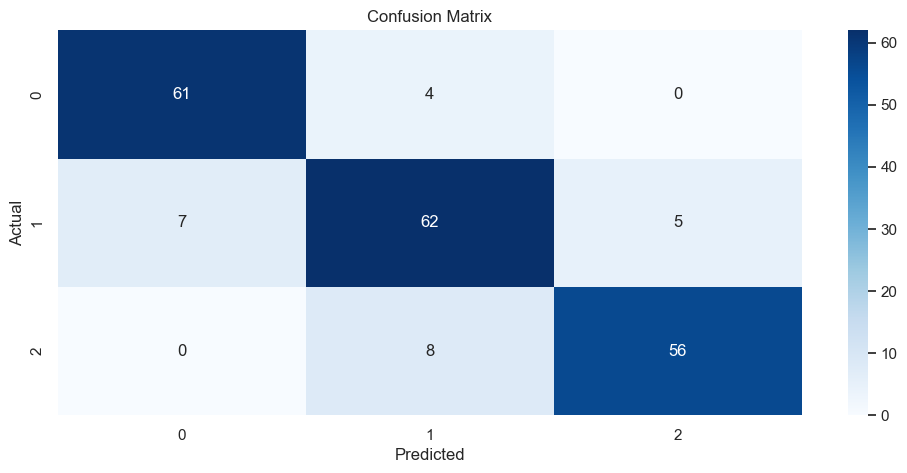

In [149]:
conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(12, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()